In [3]:
import math
import qiskit
import matplotlib as plt
from matplotlib import *
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
from scipy.stats import unitary_group

In [4]:
pi=math.pi

# 1. HASHING

## 1.1. SHIFT REGISTER

In [5]:
def lfsr(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(1,nqubits):
        qc.swap(qubit-1,qubit)
    qc.cx(nqubits-1,0)
    lfsr=qc.to_gate()
    lfsr.name = "LFSR"
    return lfsr

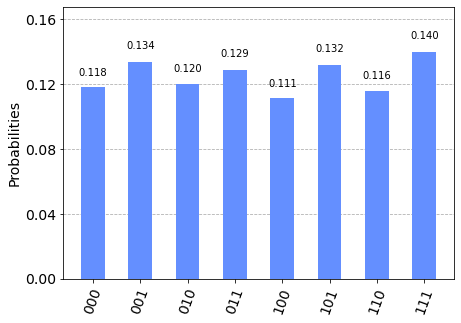

In [20]:
n=3
qc = QuantumCircuit(n)
for i in range(n):
    qc.h(i)
qc.append(lfsr(n),[x for x in range(n)])
qc.measure_all()
qc.draw()

plot_histogram(simulate(qc))

# 2. GENERALISED GROVER

In [11]:
def initialize_s(qc, qubits):
    for q in qubits:
        qc.rx(pi/2,q)
    return qc

In [4]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [5]:
def mirror(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    M_0 = qc.to_gate()
    M_0.name = "M$_0$"
    return M_0

In [6]:
def gen_grover(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.rx(pi/2,qubit)
    qc.append(mirror(nqubits),[x for x in range(nqubits)])
    for qubit in range(nqubits):
        qc.rx(-pi/2,qubit)
    G = qc.to_gate()
    G.name = "G"
    return G

In [7]:
def oracle(n):
    qc = QuantumCircuit(n)
    qc.cz(0, 2)
    qc.cz(1, 2)
    oracle_exn = qc.to_gate()
    oracle_exn.name = "U$_\omega$"
    return oracle_exn

In [8]:
def grover_circuit(n):
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [x for x in range(n)])
    grover_circuit.append(oracle(n), [x for x in range(n)])
    grover_circuit.append(gen_grover(n), [x for x in range(n)])
    grover_circuit.measure_all()
    return grover_circuit

In [9]:
def simulate(grover_circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
    qobj = assemble(transpiled_grover_circuit)
    results = aer_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [10]:
qc = QuantumCircuit(3)
qc.append(mirror(3),[x for x in range(3)])
backend = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j]])

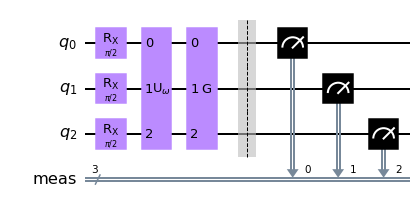

In [11]:
grover_circuit(3).draw('mpl')

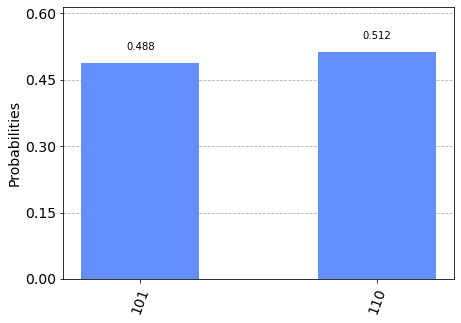

In [12]:
plot_histogram(simulate(grover_circuit(3)))